## Classifying newswires: A multiclass classification example

### The Reuters dataset

In [21]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [7]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [8]:
def vectorize(data, dimension=10000):
    
    results = np.zeros((len(data), dimension))
    
    for i, sequence in enumerate(data):
        
        for j in sequence:
            
            results[i, j] = 1.
    
    return results

In [9]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

**One Hot Encoding (categorical_crossentropy)**

In [22]:
def to_one_hot(labels, dimension=46):
    
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i, label] = 1.
    
    return results

In [ ]:
# y_train = to_one_hot(train_labels)
# y_test = to_one_hot(test_labels)

In [12]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [13]:
model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")
])

**Compiling the model**

In [14]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

**Setting aside a validation set**

In [15]:
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

x_val = x_train[:1000]
y_val = y_train[:1000]

**Training the model**

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 29ms/step - loss: 2.5385 - accuracy: 0.5130 - val_loss: 1.6899 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3858 - accuracy: 0.7060 - val_loss: 1.3010 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0396 - accuracy: 0.7764 - val_loss: 1.1513 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8159 - accuracy: 0.8257 - val_loss: 1.0227 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6554 - accuracy: 0.8603 - val_loss: 0.9665 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5271 - accuracy: 0.8909 - val_loss: 0.9585 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4255 - accuracy: 0.9094 - val_loss: 0.9026 - val_accuracy: 0.8090
Epoch 8/20
16

**Plotting the training and validation loss**

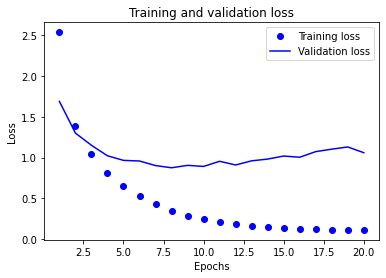

In [17]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

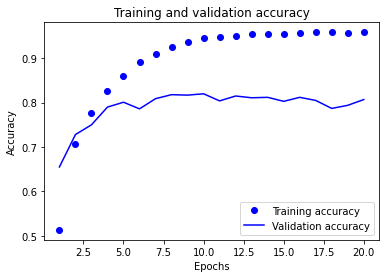

In [18]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [19]:
model = Sequential([
  Dense(64, activation="relu"),
  Dense(64, activation="relu"),
  Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 8ms/step - loss: 2.5682 - accuracy: 0.5350
Epoch 2/9
18/18 [==============================] - 0s 8ms/step - loss: 1.3144 - accuracy: 0.7267
Epoch 3/9
18/18 [==============================] - 0s 8ms/step - loss: 0.9667 - accuracy: 0.7925
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.7581 - accuracy: 0.8428
Epoch 5/9
18/18 [==============================] - 0s 7ms/step - loss: 0.6016 - accuracy: 0.8752
Epoch 6/9
18/18 [==============================] - 0s 8ms/step - loss: 0.4772 - accuracy: 0.9017
Epoch 7/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3821 - accuracy: 0.9215
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3186 - accuracy: 0.9332
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9397 - accuracy: 0.7983


In [20]:
results

[0.9396740198135376, 0.7983080744743347]

In [23]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18699910952804988

### Generating predictions on new data

In [24]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

0.9999999

In [27]:
np.argmax(predictions[0])

3